   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
   total_bill   tip  sex smoker  day    time  size
0       16.99  1.01    1     No  Sun  Dinner     2
1       10.34  1.66    0     No  Sun  Dinner     3
2       21.01  3.50    0     No  Sun  Dinner     3
3       23.68  3.31    0     No  Sun  Dinner     2
4       24.59  3.61    1     No  Sun  Dinner     4
0.3890511743237043
Total_bill =500
tip [[49.468923]]
     total_bill   tip
0         16.99  1.01
1         10.34  1.66
2         21.01  3.50
3         23.68  3.31
4         24.59  3.61
..          ...   ...
239       29.03  5.92
240       27.18  2.00
241       22.67  2.00
242       17.82  1.75
243       18.78  3.00

[244 rows x 2 columns]


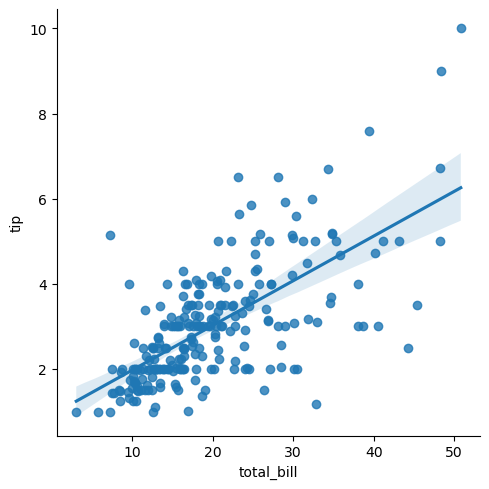

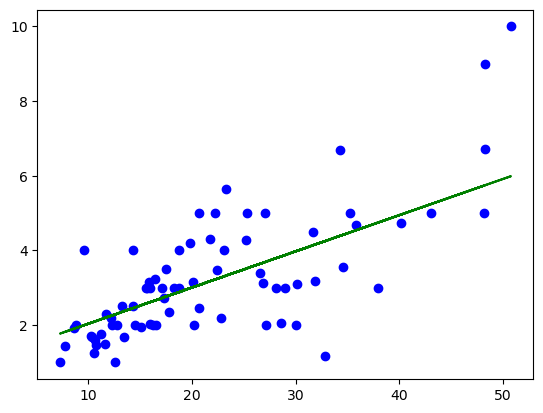

r2 score = 0.52


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as ms

data=sns.load_dataset("tips")
print(data.head())

data['sex']=data['sex'].astype('category')
data['sex']=data['sex'].cat.codes
print(data.head())

x=np.array(data['total_bill']).reshape(-1,1)
y=np.array(data['tip']).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

regr=LinearRegression()
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)
print(regr.score(x_train,y_train))

x=float(input('Total_bill ='))
y=regr.predict([[x]])
print('tip',y)

print(data[['total_bill','tip']])
sns.lmplot(x="total_bill",y="tip",data=data)
plt.show()

plt.scatter(x_test,y_test,color='b')
plt.plot(x_test,y_pred,color='g')
plt.show()

print("r2 score =",round(ms.r2_score(y_test,y_pred),2))